# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.12/x64/bin/python -m pip install --upgrade pip' command.


#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


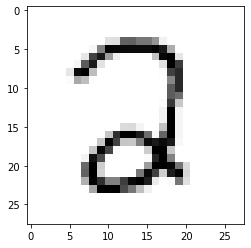

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2177
Training Accuracy: 0.7696, Testing Accuracy: 0.7631



Epoch 10, Loss 0.0564
Training Accuracy: 0.9455, Testing Accuracy: 0.9496



Epoch 20, Loss 0.0397
Training Accuracy: 0.9596, Testing Accuracy: 0.9647



Epoch 30, Loss 0.0336
Training Accuracy: 0.9646, Testing Accuracy: 0.9688



Epoch 40, Loss 0.0303
Training Accuracy: 0.9673, Testing Accuracy: 0.9703



Epoch 50, Loss 0.028
Training Accuracy: 0.9688, Testing Accuracy: 0.9718



Epoch 60, Loss 0.0264
Training Accuracy: 0.9711, Testing Accuracy: 0.9733



Epoch 70, Loss 0.0251
Training Accuracy: 0.9720, Testing Accuracy: 0.9738



Epoch 80, Loss 0.024
Training Accuracy: 0.9728, Testing Accuracy: 0.9748



Epoch 90, Loss 0.0231
Training Accuracy: 0.9739, Testing Accuracy: 0.9748



Epoch 100, Loss 0.0223
Training Accuracy: 0.9757, Testing Accuracy: 0.9748



Epoch 110, Loss 0.0215
Training Accuracy: 0.9764, Testing Accuracy: 0.9743



Epoch 120, Loss 0.0209
Training Accuracy: 0.9766, Testing Accuracy: 0.9743



Epoch 130, Loss 0.0202
Training Accuracy: 0.9771, Testing Accuracy: 0.9743



Epoch 140, Loss 0.0197
Training Accuracy: 0.9780, Testing Accuracy: 0.9748



Epoch 150, Loss 0.0191
Training Accuracy: 0.9785, Testing Accuracy: 0.9753



Epoch 160, Loss 0.0186
Training Accuracy: 0.9790, Testing Accuracy: 0.9758



Epoch 170, Loss 0.0181
Training Accuracy: 0.9793, Testing Accuracy: 0.9758



Epoch 180, Loss 0.0177
Training Accuracy: 0.9805, Testing Accuracy: 0.9763



Epoch 190, Loss 0.0172
Training Accuracy: 0.9810, Testing Accuracy: 0.9763



Epoch 200, Loss 0.0168
Training Accuracy: 0.9815, Testing Accuracy: 0.9773



Epoch 210, Loss 0.0164
Training Accuracy: 0.9821, Testing Accuracy: 0.9778



Epoch 220, Loss 0.016
Training Accuracy: 0.9828, Testing Accuracy: 0.9778



Epoch 230, Loss 0.0156
Training Accuracy: 0.9835, Testing Accuracy: 0.9783



Epoch 240, Loss 0.0152
Training Accuracy: 0.9839, Testing Accuracy: 0.9793



Epoch 250, Loss 0.0149
Training Accuracy: 0.9842, Testing Accuracy: 0.9783



0.0495350360787237

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2287
Training Accuracy: 0.7637, Testing Accuracy: 0.7641



Epoch 10, Loss 0.0985
Training Accuracy: 0.9184, Testing Accuracy: 0.9239



Epoch 20, Loss 0.0767
Training Accuracy: 0.9312, Testing Accuracy: 0.9385



Epoch 30, Loss 0.0666
Training Accuracy: 0.9374, Testing Accuracy: 0.9446



Epoch 40, Loss 0.0605
Training Accuracy: 0.9415, Testing Accuracy: 0.9486



Epoch 50, Loss 0.0562
Training Accuracy: 0.9451, Testing Accuracy: 0.9516



Epoch 60, Loss 0.0531
Training Accuracy: 0.9478, Testing Accuracy: 0.9546



Epoch 70, Loss 0.0507
Training Accuracy: 0.9489, Testing Accuracy: 0.9587



Epoch 80, Loss 0.0488
Training Accuracy: 0.9503, Testing Accuracy: 0.9602



Epoch 90, Loss 0.0472
Training Accuracy: 0.9513, Testing Accuracy: 0.9612



Epoch 100, Loss 0.0458
Training Accuracy: 0.9527, Testing Accuracy: 0.9622



Epoch 110, Loss 0.0447
Training Accuracy: 0.9538, Testing Accuracy: 0.9632



Epoch 120, Loss 0.0436
Training Accuracy: 0.9543, Testing Accuracy: 0.9632



Epoch 130, Loss 0.0427
Training Accuracy: 0.9546, Testing Accuracy: 0.9632



Epoch 140, Loss 0.0419
Training Accuracy: 0.9553, Testing Accuracy: 0.9637



Epoch 150, Loss 0.0412
Training Accuracy: 0.9560, Testing Accuracy: 0.9647



Epoch 160, Loss 0.0406
Training Accuracy: 0.9568, Testing Accuracy: 0.9652



Epoch 170, Loss 0.04
Training Accuracy: 0.9573, Testing Accuracy: 0.9652



Epoch 180, Loss 0.0394
Training Accuracy: 0.9578, Testing Accuracy: 0.9652



Epoch 190, Loss 0.0389
Training Accuracy: 0.9583, Testing Accuracy: 0.9652



Epoch 200, Loss 0.0384
Training Accuracy: 0.9588, Testing Accuracy: 0.9652



Epoch 210, Loss 0.038
Training Accuracy: 0.9593, Testing Accuracy: 0.9647



Epoch 220, Loss 0.0376
Training Accuracy: 0.9596, Testing Accuracy: 0.9647



Epoch 230, Loss 0.0372
Training Accuracy: 0.9602, Testing Accuracy: 0.9647



Epoch 240, Loss 0.0369
Training Accuracy: 0.9604, Testing Accuracy: 0.9647



Epoch 250, Loss 0.0365
Training Accuracy: 0.9607, Testing Accuracy: 0.9652



0.02321443772741798

### Comparing results of NN and LR

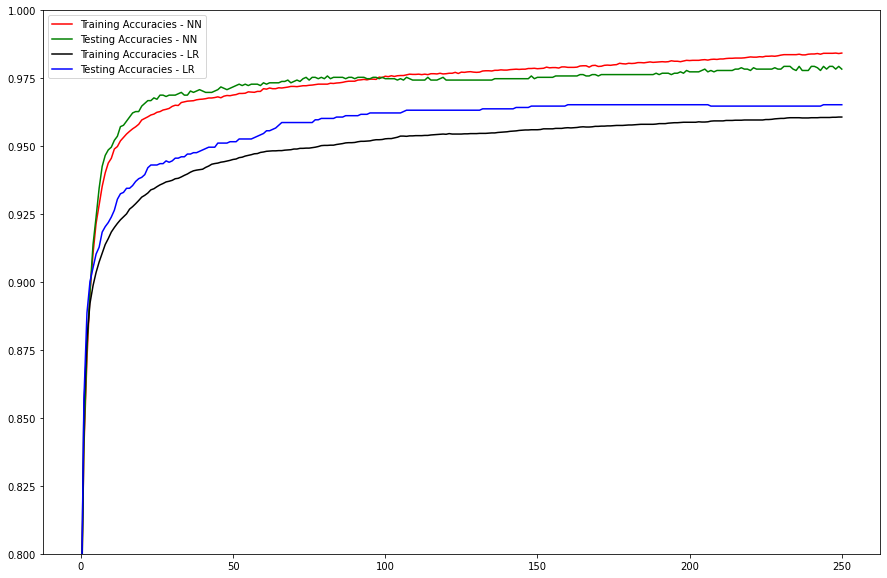

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

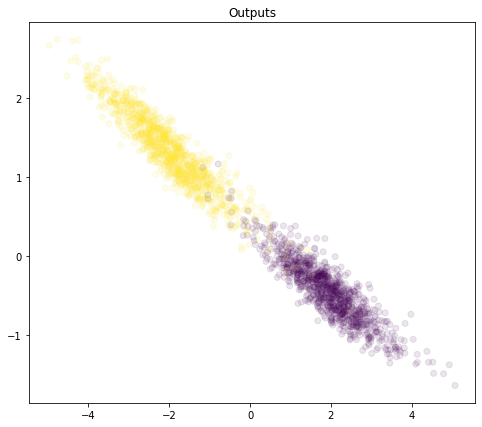

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

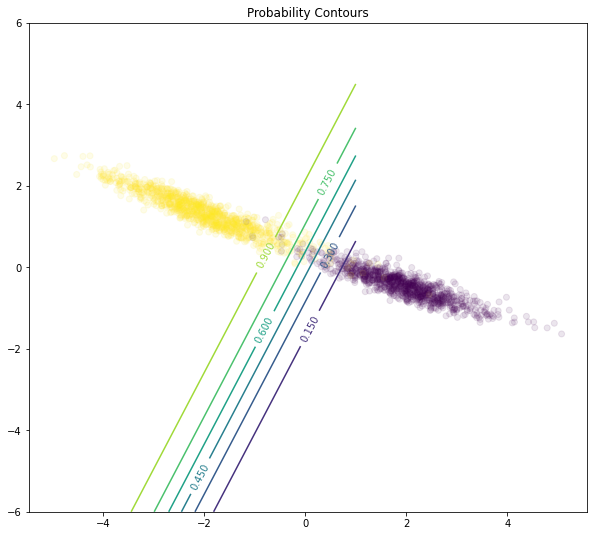

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );